# Poverty Analysis - Kmeans Clustering
Author - Prajakta Gaydhani

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#clustering
from sklearn.cluster import SpectralClustering 
from sklearn.cluster import KMeans

## 1. Read poverty Data

In [4]:
train = pd.read_csv("final_cleaned_v1.csv")
train.head()

,Target_x,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,...,parentesco10,parentesco11,parentesco12,rez_esc,escolari,age,inst,escolari/age,inst/age,tech
0,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,10,43,3,0.232558,0.069767,1
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,12,67,7,0.179104,0.104478,2
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,11,92,4,0.119565,0.043478,0
3,0,0,0,1,1,1,0,0,0,0,...,0,0,0,1,9,17,3,0.529412,0.176471,2
4,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,11,37,4,0.297297,0.108108,2


## 2. Separate features and the class from the dataset

In [5]:
Target = train['Target_x']
temp = train.iloc[ : , 1:]

## 3. Impute missing values and rescale the dataset

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), 
                      ('scaler', StandardScaler())])

#comments
Target = train['Target_x']
temp = train.iloc[ : , 1:]

#apply the tranform to the data
transformed_data = pd.DataFrame(pipeline.fit_transform(temp), columns=temp.columns) 
transformed_data = transformed_data

## 4. Implement k-means clustering using scikit-learn 

[[-0.41794591 -0.28998112]
 [ 1.83518008  1.5431651 ]
 [-1.09018915 -1.32893484]
 [ 0.29943847  0.54189363]]


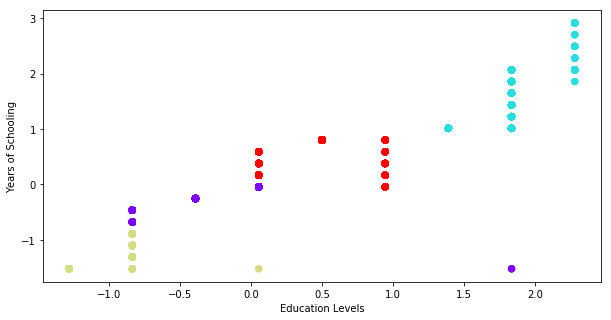

In [10]:
# create kmeans object

kmans_data = transformed_data[['inst', "escolari"]].values
#kmans_data = transformed_data.values

kmeans = KMeans(n_clusters=4, max_iter = 10000, n_init =1000)
# fit kmeans object to data
kmeans.fit(kmans_data)
#print(kmeans.cluster_centers_)
y_km = kmeans.fit_predict(kmans_data)
C= kmeans.cluster_centers_

print(kmeans.cluster_centers_)

plt.figure(figsize = (10,5))
ax = plt.scatter(kmans_data[:,0], kmans_data[:,1], s=40, c = y_km, cmap = 'rainbow');
plt.xlabel("Education Levels")
plt.ylabel("Years of Schooling");

[[-0.26786369 -0.86767646]
 [-0.18425068  2.31300665]
 [ 2.45144053 -0.18154981]
 [-0.23411877  0.32470114]]


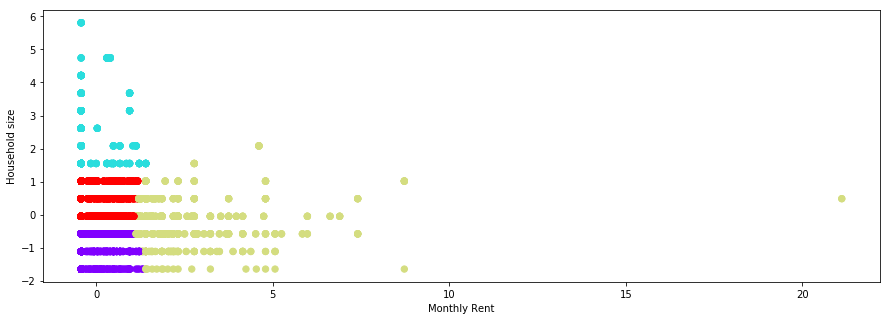

In [22]:
from sklearn.cluster import KMeans

kmans_data = transformed_data[['v2a1', "tamviv"]].values
#kmans_data = transformed_data.values

kmeans = KMeans(n_clusters=4, max_iter = 1000, n_init =100)
# fit kmeans object to data
kmeans.fit(kmans_data)
#print(kmeans.cluster_centers_)
y_km = kmeans.fit_predict(kmans_data)
C= kmeans.cluster_centers_
print(kmeans.cluster_centers_)

plt.figure(figsize = (15,5))
ax = plt.scatter(kmans_data[:,0], kmans_data[:,1], s=40, c = y_km, cmap = 'rainbow');
plt.xlabel("Monthly Rent")
plt.ylabel("Household size");

#homogeneity_score 0.89

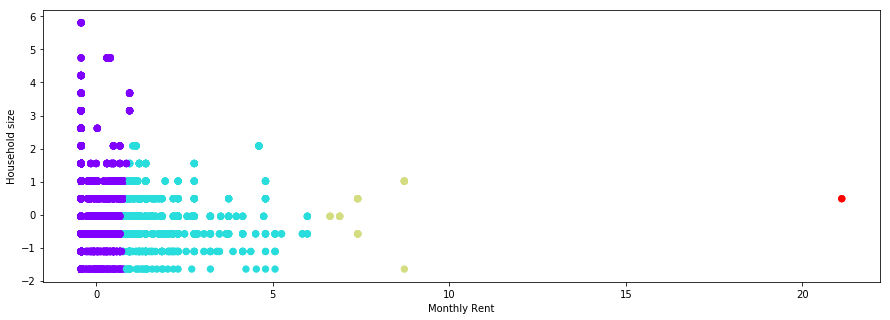

In [189]:
kmans_data = transformed_data[['v2a1', "tamviv"]].values
clustering = SpectralClustering(n_clusters=4,
        assign_labels="discretize",
        random_state=41, n_jobs=-1).fit(kmans_data)
clustering.labels_

y_km = clustering.fit_predict(kmans_data)

plt.figure(figsize = (15,5))
ax = plt.scatter(kmans_data[:,0], kmans_data[:,1], s=40, c = y_km, cmap = 'rainbow');
plt.xlabel("Monthly Rent")
plt.ylabel("Household size");

#homogeneity_score 0.70

[[-0.32651364 -0.71670346]
 [-0.34705784  1.08116245]
 [ 1.30242136 -0.32954783]
 [ 4.82306559 -0.1038443 ]]


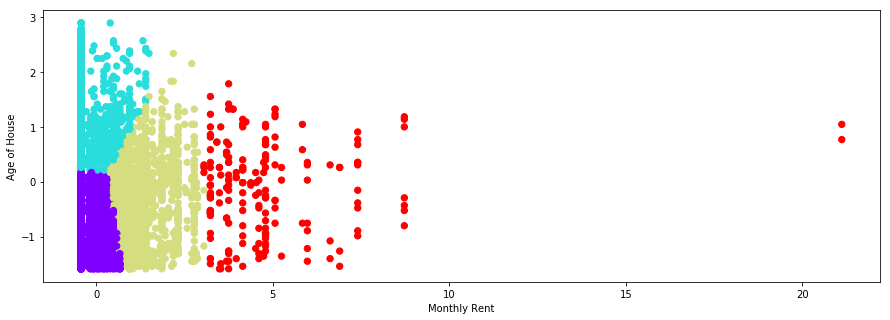

In [12]:
kmans_data = transformed_data[['v2a1', "age"]].values
#kmans_data = transformed_data.values

kmeans = KMeans(n_clusters=4, max_iter = 1000, n_init =100)
# fit kmeans object to data
kmeans.fit(kmans_data)
#print(kmeans.cluster_centers_)
y_km = kmeans.fit_predict(kmans_data)
C= kmeans.cluster_centers_
print(kmeans.cluster_centers_)

plt.figure(figsize = (15,5))
ax = plt.scatter(kmans_data[:,0], kmans_data[:,1], c=y_km,  s=40, cmap = 'rainbow');
plt.xlabel("Monthly Rent")
plt.ylabel("Age of House");

#homogeneity_score 0.85

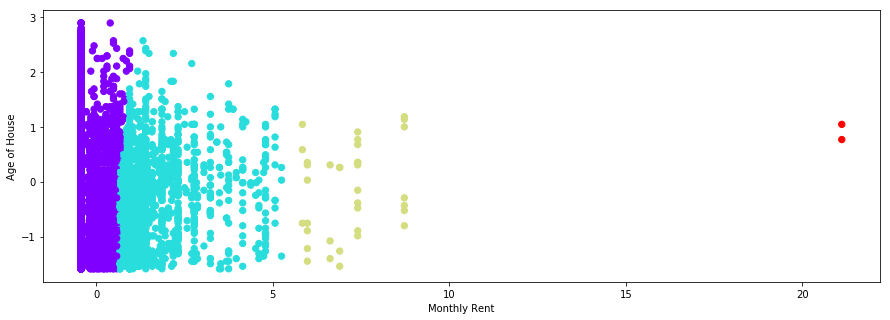

In [9]:
kmans_data = transformed_data[['v2a1', "age"]].values
clustering = SpectralClustering(n_clusters=4,
        assign_labels="discretize",
        random_state=41, n_jobs=-1).fit(kmans_data)
clustering.labels_

y_km = clustering.fit_predict(kmans_data)

plt.figure(figsize = (15,5))
ax = plt.scatter(kmans_data[:,0], kmans_data[:,1], c=y_km,  s=40, cmap = 'rainbow');
plt.xlabel("Monthly Rent")
plt.ylabel("Age of House");


#homogeneity_score 0.90